# Importing Libraries  #

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset #


In [3]:
# loading the diabetes dataset to a pandas DataFrame
wine_dataset = pd.read_csv('DataSet\winequality-red.csv') 

In [4]:
# printing the first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# number of rows and Columns in this dataset
wine_dataset.shape

(3048, 12)

In [6]:
# getting the statistical measures of the data
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000
mean,8.386253,0.526509,0.274009,2.540502,0.088096,15.744094,46.742126,0.996797,3.307051,0.658570,10.413763,5.638780
std,1.742201,0.179102,0.194950,1.385718,0.047707,10.436933,33.054501,0.001888,0.154514,0.172025,1.071473,0.805563
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.390000,0.100000,1.900000,0.071000,7.000000,22.000000,0.995660,3.200000,0.550000,9.500000,5.000000
50%,8.000000,0.520000,0.260000,2.200000,0.080000,13.000000,38.000000,0.996800,3.300000,0.620000,10.100000,6.000000
75%,9.300000,0.635000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997900,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine_dataset['quality'].value_counts()

5    1302
6    1211
7     384
4     100
8      34
3      17
Name: quality, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [8]:
wine_dataset.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.594118,0.886765,0.194118,2.535294,0.131118,11.235294,24.882353,0.997538,3.394118,0.570588,9.955882
4,7.852000,0.691450,0.175500,2.737000,0.091490,12.530000,37.410000,0.996564,3.374200,0.597800,10.267500
5,8.212519,0.577312,0.245630,2.522926,0.093276,16.834101,56.860983,0.997150,3.301705,0.621621,9.886137
6,8.430636,0.494963,0.276862,2.476796,0.085675,15.564822,41.094963,0.996676,3.313072,0.675301,10.616171
7,8.942708,0.403698,0.379609,2.743229,0.077102,13.882812,34.781250,0.996147,3.288203,0.740937,11.470095
8,8.641176,0.426471,0.396176,2.617647,0.068647,13.117647,33.852941,0.995257,3.269118,0.770000,12.138235


# Data Visulization

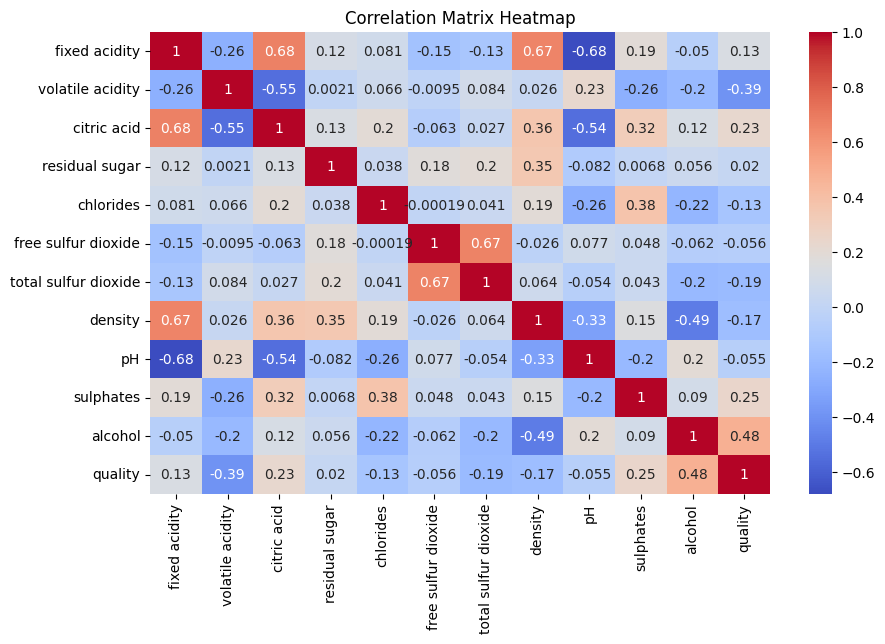

In [9]:
# Create a heatmap of a correlation matrix
corr = wine_dataset.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Creating a histogram 

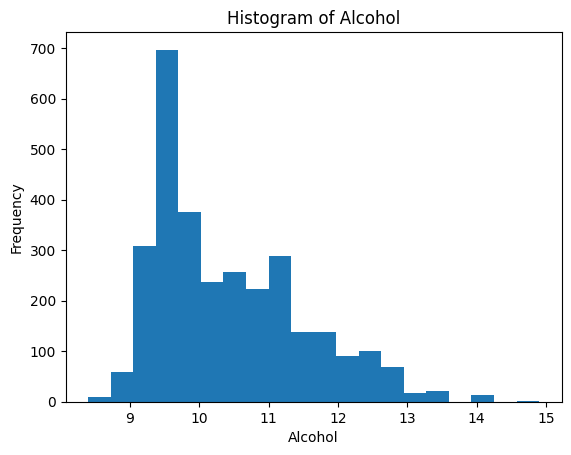

In [10]:
plt.hist(wine_dataset['alcohol'], bins=20)
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.title('Histogram of Alcohol')
plt.show()

# Creating a box plot 

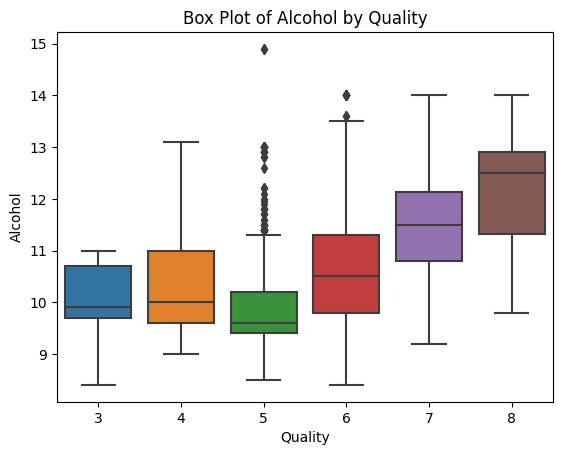

In [11]:
sns.boxplot(x='quality', y='alcohol', data=wine_dataset)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Box Plot of Alcohol by Quality')
plt.show()

# Creaing a Bar chart 

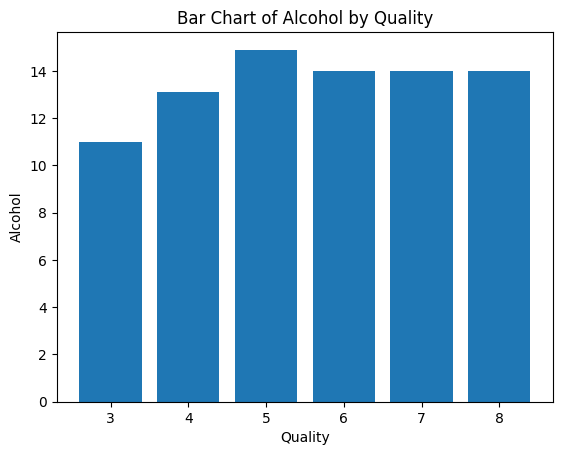

In [12]:
plt.bar(wine_dataset['quality'], wine_dataset['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Bar Chart of Alcohol by Quality')
plt.show()


# Creaing a Pie chart 

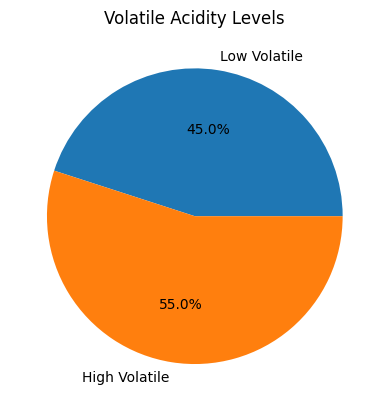

In [13]:
low_volatile = wine_dataset[wine_dataset['volatile acidity'] < 0.5].count()[0]
high_volatile = wine_dataset[wine_dataset['volatile acidity'] >= 0.5].count()[0]
labels = ['Low Volatile', 'High Volatile']
sizes = [low_volatile, high_volatile]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Volatile Acidity Levels')
plt.show()